In [36]:
#####라이브러리 불러오기

import pandas as pd
import numpy as np
import seaborn as sns
import folium

import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

%matplotlib inline

In [7]:
####공공데이터_csv자료
####데이터 구조 파악하기

df = pd.read_csv('소상공인시장진흥공단_상가업소정보_의료기관_201909[1].csv')
df.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(91335, 39)

In [9]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [23]:
df['시도명'].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [11]:
df['상권업종중분류명']

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
           ...   
91330      약국/한약방
91331    의료관련서비스업
91332          병원
91333          병원
91334          병원
Name: 상권업종중분류명, Length: 91335, dtype: object

In [12]:
df['상권업종소분류명']

0           산부인과
1          내과/외과
2           신경외과
3           기타병원
4             약국
          ...   
91330         약국
91331      산후조리원
91332    노인/치매병원
91333        한의원
91334       안과의원
Name: 상권업종소분류명, Length: 91335, dtype: object

In [61]:
df_verbal = df[df['상권업종소분류명']=='언어치료'].copy()
df_verbal

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
22,21013731,세종언어치료센터,NaN,S,의료,S03,유사의료업,S03B07,언어치료,Q86902,...,2641010700100840001017686,NaN,부산광역시 금정구 중앙대로 1817-11,609310.0,46273.0,NaN,3,NaN,129.091662,35.246528
108,21914637,태화아동발달지원센터,NaN,S,의료,S03,유사의료업,S03B07,언어치료,Q86902,...,3014011600100270000008172,NaN,대전광역시 중구 보문산로333번길 29,301130.0,35020.0,NaN,1,NaN,127.412725,36.312953
277,21840638,소리언어청각센터,NaN,S,의료,S03,유사의료업,S03B07,언어치료,Q86902,...,3017010500102550001014395,NaN,대전광역시 서구 계룡로 670-1,302845.0,35305.0,NaN,2,NaN,127.395183,36.336371
295,25355349,이순영언어발달센터,NaN,S,의료,S03,유사의료업,S03B07,언어치료,Q86902,...,4146311600106730000018242,라비스타,경기도 용인시 기흥구 어정로 139,446911.0,16988.0,NaN,3,NaN,127.144714,37.275884
430,20861641,서울언어치료센터,NaN,S,의료,S03,유사의료업,S03B07,언어치료,Q86902,...,1171010400100950055013236,장원빌딩,서울특별시 송파구 가락로 139-1,138170.0,5668.0,NaN,4,NaN,127.111360,37.502574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91087,16360195,해든아동발달센터,NaN,S,의료,S03,유사의료업,S03B07,언어치료,Q86902,...,4615011400116850001000001,NaN,전라남도 순천시 팔마3길 14-6,540976.0,58002.0,NaN,NaN,NaN,127.516803,34.934666
91088,16358208,토리아동발달센터,NaN,S,의료,S03,유사의료업,S03B07,언어치료,Q86902,...,4128110400106290001000001,NaN,경기도 고양시 덕양구 삼송로 12,412040.0,10564.0,NaN,7,704,126.875523,37.649560
91089,16357593,화담아동청소년발달센터,NaN,S,의료,S03,유사의료업,S03B07,언어치료,Q86902,...,2723010600103290002044572,NaN,대구광역시 북구 침산로 168,702856.0,41560.0,NaN,3,304,128.590630,35.891206
91254,16125557,사랑샘아동발달지원센터,NaN,S,의료,S03,유사의료업,S03B07,언어치료,Q86902,...,4375031025127230000000001,NaN,충청북도 진천군 덕산면 연미1길 29,365841.0,27875.0,NaN,3,301,127.528236,36.900770


In [28]:
df_verbal_local = df_verbal['시도명'].value_counts()

<AxesSubplot:>

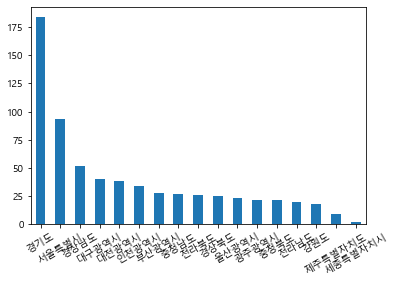

In [35]:
####전국에 있는 언어치료 병원의 도별 분포 구하기

df_verbal_local.plot.bar(figsize=(6,4),rot=30)


In [42]:
####scatter로 병원을 서울 지도에 표현하기

df_verbal['경도'].mean()




127.51166272240128

In [43]:
df_verbal['위도'].mean()

36.587392297692794

<AxesSubplot:xlabel='경도', ylabel='위도'>

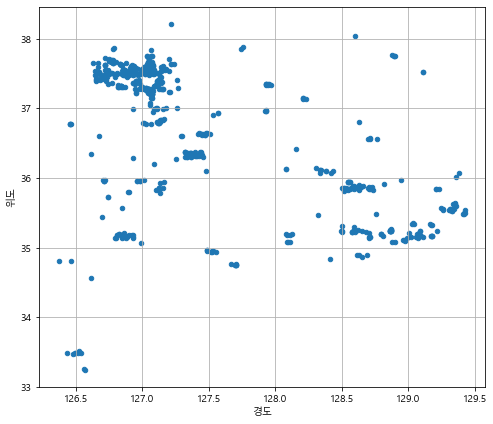

In [69]:
df_verbal[['경도','위도','시군구명']].plot.scatter(x='경도',y='위도',
                                          figsize=(8,7),grid=True)

In [101]:
df_seoul = df[df['시도명'] == '서울특별시'].copy()


<AxesSubplot:xlabel='경도', ylabel='위도'>

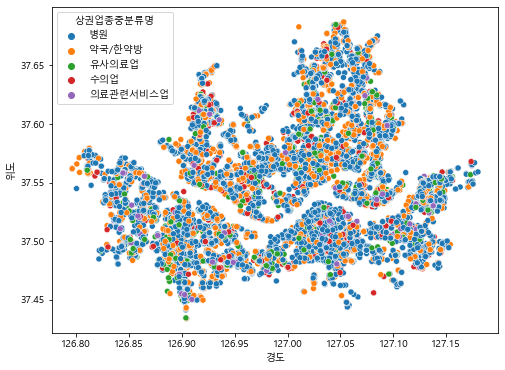

In [82]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df_seoul,x='경도',y='위도',hue='상권업종중분류명')




In [96]:
####서울 피부과 성형외과의 분포

df_beauty = df[(df['상권업종소분류명'] =='정형/성형외과') & (df['시도명'] =='서울특별시')].copy()
df_skin = df[(df['상권업종소분류명'] =='피부과') & (df['시도명'] =='서울특별시') ].copy()


<AxesSubplot:xlabel='경도', ylabel='위도'>

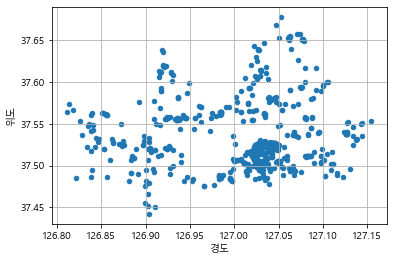

In [99]:
df_beauty.plot.scatter(x='경도',y='위도',grid=True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

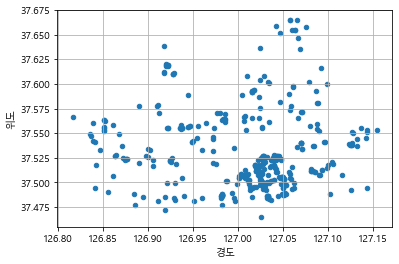

In [100]:
df_skin.plot.scatter(x='경도',y='위도',grid=True)